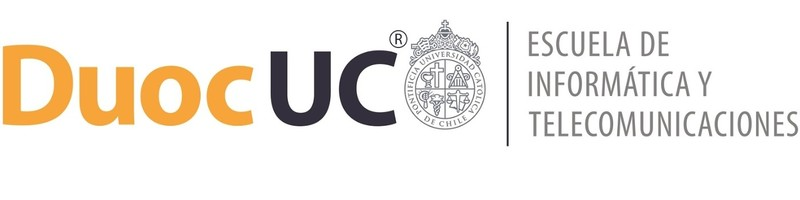

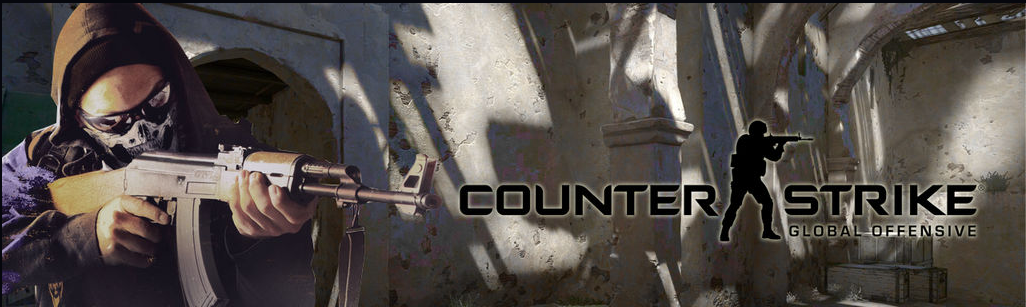

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: Álvaro Flores, Aurora Mansilla, Ricardo Ojeda, Ella Zampeze

Docente: Giocrisrai Godoy    

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1.1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

## Objetivo del proyecto

El objetivo de este proyecto es analizar los datos de las partidas del videojuego Counter Strike: GO con el fin de afirmar o descartar las hipótesis planteadas a continuación.

# Hipótesis

H1: A mayor valor de equipamiento inicial , mayor será el tiempo que un jugador sobrevive . Esto se va a extraer del tiempo de vida de los jugadores durante las partidas (regresión).


H2: El tipo de arma principal se relaciona con el tiempo de vida del jugador. Se hará un conteo de la probabilidad de supervivencia clasificando por el tipo de arma, así se realizará la comparación entre datos (clasificación).


## Fase 1.2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

# NOTA: Este código debe ser modificado en caso de no haber renombrado el archivo .csv como se indica.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

import pandas as pd

# Leer CSV con separador ;
df = pd.read_csv("csgo_ET2022.csv", sep=";")

# Vista general del dataset
print(f"") #----
print(df.shape)
print(f"") #----
print(df.columns)
print(f"") #----
df.info()

Saving csgo_ET2022.csv to csgo_ET2022.csv

(79157, 30)

Index(['id', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team   

<ipython-input-1-2aea2ac1eb65>:19: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("csgo_ET2022.csv", sep=";")


In [ ]:
df.head()

id         Map       Team  InternalTeamId  MatchId  RoundId RoundWinner  \
0  600  de_inferno  Terrorist               1        4        1       False   
1  601  de_inferno  Terrorist               1        4        1       False   
2  602  de_inferno  Terrorist               1        4        1       False   
3  603  de_inferno  Terrorist               1        4        1       False   
4  604  de_inferno  Terrorist               1        4        1       False   

  MatchWinner  Survived  AbnormalMatch  ... RoundKills RoundAssists  \
0        True     False          False  ...          0            0   
1        True     False          False  ...          0            0   
2        True     False          False  ...          0            0   
3        True     False          False  ...          0            0   
4        True      True          False  ...          0            0   

   RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0               0                0                          750   
1               0                0                          800   
2               0                0                         1000   
3               0                0                          850   
4               0                0                         1000   

   TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  \
0                        4400           0                0             0   
1                        4400           0                0             0   
2                        4400           0                0             0   
3                        4400           0                0             0   
4                        4400           0                0             0   

  MatchHeadshots  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 30 columns]

In [ ]:
df.describe()

id  InternalTeamId       MatchId       RoundId  \
count   79157.000000    79157.000000  79157.000000  79157.000000   
mean    60570.193640        1.500006    250.525033     12.765517   
std     36436.598386        0.500003    149.557804      7.432837   
min       600.000000        1.000000      4.000000      1.000000   
25%     30830.000000        1.000000    128.000000      6.000000   
50%     56720.000000        2.000000    236.000000     12.000000   
75%     90639.000000        2.000000    373.000000     19.000000   
max    123779.000000        2.000000    511.000000     36.000000   

       RLethalGrenadesThrown  RNonLethalGrenadesThrown  PrimaryAssaultRifle  \
count           79157.000000              79157.000000         79157.000000   
mean                0.498667                  1.258057             0.675363   
std                 0.597985                  1.184909             0.464125   
min                 0.000000                  0.000000             0.000000   
25%                 0.000000                  0.000000             0.000000   
50%                 0.000000                  1.000000             1.000000   
75%                 1.000000                  2.000000             1.000000   
max                 4.000000                  6.000000             1.000000   

       PrimarySniperRifle  PrimaryHeavy    PrimarySMG  ...    RoundKills  \
count        79157.000000  79157.000000  79157.000000  ...  79157.000000   
mean             0.089840      0.005964      0.007046  ...      0.671349   
std              0.279797      0.075497      0.082453  ...      0.881798   
min              0.000000      0.000000      0.000000  ...      0.000000   
25%              0.000000      0.000000      0.000000  ...      0.000000   
50%              0.000000      0.000000      0.000000  ...      0.000000   
75%              0.000000      0.000000      0.000000  ...      1.000000   
max              1.000000      1.000000      1.000000  ...      5.000000   

       RoundAssists  RoundHeadshots  RoundFlankKills  \
count  79157.000000    79157.000000     79157.000000   
mean       0.146178        0.301553         0.095633   
std        0.385601        0.578843         0.320641   
min        0.000000        0.000000         0.000000   
25%        0.000000        0.000000         0.000000   
50%        0.000000        0.000000         0.000000   
75%        0.000000        0.000000         0.000000   
max        4.000000        5.000000         5.000000   

       RoundStartingEquipmentValue  TeamStartingEquipmentValue    MatchKills  \
count                 79157.000000                79157.000000  79157.000000   
mean                   3778.108695                18890.133532      8.511578   
std                    2111.285406                 9743.203024      6.195079   
min                       0.000000                    0.000000      0.000000   
25%                    1600.000000                10900.000000      3.000000   
50%                    4700.000000                22550.000000      8.000000   
75%                    5200.000000                26050.000000     13.000000   
max                    8850.000000                36150.000000     41.000000   

       MatchFlankKills  MatchAssists  MatchHeadshots  
count     79157.000000  79157.000000    79157.000000  
mean          1.209912      1.874831        3.858484  
std           1.435150      1.824027        3.246752  
min           0.000000      0.000000        0.000000  
25%           0.000000      0.000000        1.000000  
50%           1.000000      1.000000        3.000000  
75%           2.000000      3.000000        6.000000  
max          11.000000     14.000000       22.000000  

[8 rows x 21 columns]

In [ ]:
# Ver si hay valores nulos
df.isnull().sum()

id                             0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64

# Fase 3: Data Preparation | Limpieza general

In [ ]:
# Copiar dataset original
df_clean = df[df["AbnormalMatch"] == False].copy()  # Eliminar partidas con error de red

# Limpiar y convertir TimeAlive a segundos (dividir por 1e14)
# NOTA: una ronda normal en CS:GO dura en promedio entre 15 y 155 segundos
df_clean["TimeAlive"] = df_clean["TimeAlive"].str.replace(".", "", regex=False)
df_clean["TimeAlive"] = pd.to_numeric(df_clean["TimeAlive"], errors="coerce") / 1e14

# Filtrar valores de TimeAlive fuera del rango normal de una ronda
df_clean = df_clean[(df_clean["TimeAlive"] >= 15) & (df_clean["TimeAlive"] <= 155)]

# Limpiar y convertir TravelledDistance (remover puntos y convertir a metros)
# NOTA: un jugador en CS:GO puede recorrer de 10 a 150 metros aprox.
df_clean["TravelledDistance"] = df_clean["TravelledDistance"].astype(str).str.replace(",", ".", regex=False)
df_clean["TravelledDistance"] = df_clean["TravelledDistance"].str.replace(".", "", regex=False)
df_clean["TravelledDistance"] = pd.to_numeric(df_clean["TravelledDistance"], errors="coerce") / 1e15

# Eliminar outliers en RoundStartingEquipmentValue usando IQR
Q1 = df_clean["RoundStartingEquipmentValue"].quantile(0.25)
Q3 = df_clean["RoundStartingEquipmentValue"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[
    (df_clean["RoundStartingEquipmentValue"] >= lower_bound) &
    (df_clean["RoundStartingEquipmentValue"] <= upper_bound)
]

<ipython-input-5-b9c0527d274a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["TravelledDistance"] = df_clean["TravelledDistance"].astype(str).str.replace(",", ".", regex=False)
<ipython-input-5-b9c0527d274a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["TravelledDistance"] = df_clean["TravelledDistance"].str.replace(".", "", regex=False)
<ipython-input-5-b9c0527d274a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
print(df_clean[["TimeAlive", "TravelledDistance"]].describe()) # revisamos cómo afectó esta limpieza a las columnas 'TimeAlive' y 'TravelledDistance'.

          TimeAlive  TravelledDistance
count  56214.000000       56214.000000
mean      75.080981          11.881881
std       27.673434          12.302108
min       15.033467           0.000000
25%       52.192211           5.462743
50%       74.951775           9.088984
75%       95.410775          13.355638
max      154.548722          65.530265


## Trabajo de limpieza sobre dato erróneo (Jugador 629)

In [ ]:
# Se analiza RoundWinner y MatchWinner en busca valores distintos y se pasan a booleano
print(df['RoundWinner'].unique())
print(df['MatchWinner'].unique())
nulos_matchwinner = df['MatchWinner'].isnull().sum()
print(f"Cantidad de valores NaN en MatchWinner: {nulos_matchwinner}")

['False' 'True' 'False4' True False]
[True False nan]
Cantidad de valores NaN en MatchWinner: 1


In [ ]:
# Encontrar la fila donde se encuentra el valor 'False4'
errores_roundwinner = df_clean[df_clean['RoundWinner'] == 'False4']

# Mostrar las columnas afectadas
print(errores_roundwinner[['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner']])

     id         Map  InternalTeamId  MatchId  RoundId RoundWinner
29  629  de_inferno               2        4        3      False4


In [ ]:
# Buscar todos los jugadores de MatchId=4 y RoundId=3 y las columnas afectadas
ronda_especifica = df_clean[
    (df_clean['MatchId'] == 4) &
    (df_clean['RoundId'] == 3)
]
print(ronda_especifica[['id', 'InternalTeamId', 'RoundWinner']])

     id  InternalTeamId RoundWinner
21  621               1        True
22  622               1        True
24  624               1        True
25  625               2       False
26  626               2       False
27  627               2       False
28  628               2       False
29  629               2      False4


In [ ]:
# Se cambia dato de 'False4' por 'False' al jugador correspondiente.
df_clean.loc[
    (df_clean['id'] == 629) &
    (df_clean['MatchId'] == 4) &
    (df_clean['RoundId'] == 3),
    'RoundWinner'
] = False

# Mapear los valores para corregir 'True' y 'False' como booleanos reales
df_clean['RoundWinner'] = df_clean['RoundWinner'].map({
    'True': True,
    'False': False,
    True: True,
    False: False
})

# Volver a listar los valores únicos de RoundWinner
print(df_clean['RoundWinner'].unique())

[False  True]


# Tratamiento de nulos

#### Previamente pudimos observar cómo habian datos nulos en las columnas 'Team' y 'MatchWinner'. Estos valores serán tratados a continuación:

In [ ]:
print(df_clean['MatchWinner'].unique())
print(df_clean['Team'].unique())

[True False nan]
['Terrorist' 'CounterTerrorist' nan]


In [ ]:
# Mostrar la fila que tiene MatchWinner nulo
fila_matchwinner_nulo = df_clean[df_clean['MatchWinner'].isnull()]
print(fila_matchwinner_nulo[['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner']])

print(f"")
# Mostrar las filas que tiene Team nulo
fila_matchwinner_nulo = df_clean[df_clean['Team'].isnull()]
print(fila_matchwinner_nulo[['id', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner']])

     id         Map  InternalTeamId  MatchId  RoundId MatchWinner
29  629  de_inferno               2        4        3         NaN

     id         Map Team  InternalTeamId  MatchId  RoundId MatchWinner
13  613  de_inferno  NaN               1        4        2        True
27  627  de_inferno  NaN               2        4        3       False


## Tratamiento para el valor nulo en 'MatchWinner'
Previamente nos encontramos con el mismo jugador 629 el cual presentaba problemas de error de tipeo en un dato False.

Los datos que ahora tenemos para el tratamiento del nulo es:

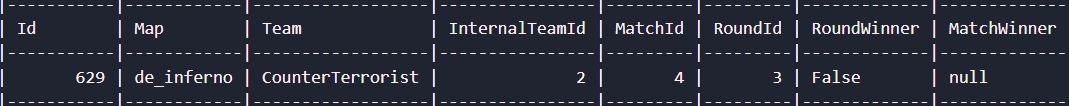

In [ ]:
# Filtrar todas las filas del MatchId 4
partida = df_clean[df_clean['MatchId'] == 4]

# Analizar qué equipo ganó más rondas
rondas_ganadas = partida.groupby('Team')['RoundWinner'].sum()

print(rondas_ganadas)

Team
CounterTerrorist    21
Terrorist           63
Name: RoundWinner, dtype: int64


In [ ]:
# Dado que el jugador 629 tiene como 'Team' CounterTerrorist ahora podemos agregar el valor correspondiente en 'MatchWinner', es decir, False
df_clean.loc[
    (df_clean['id'] == 629),
    'MatchWinner'
] = False

In [ ]:
# Verificamos los nuevos valores
print(df_clean.loc[(df_clean['id'] == 629) & (df_clean['MatchId'] == 4), ['id', 'Map', 'InternalTeamId', 'MatchId', 'RoundId', 'RoundWinner', 'MatchWinner']])

     id         Map  InternalTeamId  MatchId  RoundId  RoundWinner MatchWinner
29  629  de_inferno               2        4        3        False       False


# Tratamiento de valores nulos en 'Team'

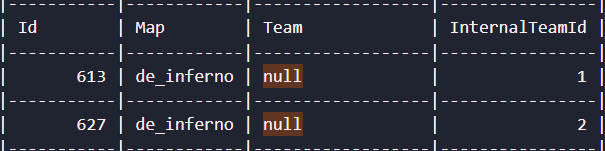

In [ ]:
# Mostrar las combinaciones únicas entre InternalTeamId y Team
combinaciones = df_clean[["MatchId", "InternalTeamId", "Team"]].drop_duplicates()
display(combinaciones.sort_values(["InternalTeamId", "Team"]))

# Contar cuántas veces cada InternalTeamId se asocia a cada Team
conteo = df_clean.groupby(["InternalTeamId", "Team"]).size().reset_index(name='Cantidad')
display(conteo.sort_values("InternalTeamId"))

# Verificar si dentro de una misma partida (MatchId) los equipos cambian su rol (T o CT)
cambio_en_partidas = df_clean.groupby(["MatchId", "InternalTeamId", "Team"]).size().reset_index(name='Recuento')
display(cambio_en_partidas.sort_values(["MatchId", "InternalTeamId"]))

# Identificar casos donde el mismo InternalTeamId se asocia a ambos bandos en distintas partidas
pivot = conteo.pivot(index="InternalTeamId", columns="Team", values="Cantidad")
display(pivot)

MatchId  InternalTeamId              Team
153          4               1  CounterTerrorist
343          6               1  CounterTerrorist
539          9               1  CounterTerrorist
783         10               1  CounterTerrorist
899         11               1  CounterTerrorist
...        ...             ...               ...
78032      505               2         Terrorist
78255      506               2         Terrorist
78692      509               2         Terrorist
78962      510               2         Terrorist
27           4               2               NaN

[1311 rows x 3 columns]

InternalTeamId              Team  Cantidad
0               1  CounterTerrorist     11015
1               1         Terrorist     17006
2               2  CounterTerrorist     17199
3               2         Terrorist     10992

MatchId  InternalTeamId              Team  Recuento
0           4               1  CounterTerrorist        32
1           4               1         Terrorist        52
2           4               2  CounterTerrorist        59
3           4               2         Terrorist        31
4           6               1  CounterTerrorist         4
...       ...             ...               ...       ...
1304      510               1         Terrorist        56
1305      510               2  CounterTerrorist        54
1306      510               2         Terrorist        47
1307      511               1         Terrorist        14
1308      511               2  CounterTerrorist        16

[1309 rows x 4 columns]

Team            CounterTerrorist  Terrorist
InternalTeamId                             
1                          11015      17006
2                          17199      10992

In [ ]:
# Filtramos los valores de matchid 510 donde internal team id 2 es terrorist y counterterrorist
filtered_df = df_clean[
    (df_clean['MatchId'] == 510) &
    (
        (df_clean['InternalTeamId'] == 2) &
        ((df_clean['Team'] == 'Terrorist') | (df_clean['Team'] == 'CounterTerrorist'))
    )
]

print(filtered_df[['MatchId', 'InternalTeamId', 'Team']])

       MatchId  InternalTeamId              Team
78812      510               2  CounterTerrorist
78814      510               2  CounterTerrorist
78815      510               2  CounterTerrorist
78816      510               2  CounterTerrorist
78822      510               2  CounterTerrorist
...        ...             ...               ...
79093      510               2         Terrorist
79094      510               2         Terrorist
79095      510               2         Terrorist
79096      510               2         Terrorist
79106      510               2         Terrorist

[101 rows x 3 columns]


## Justificación para imputación de valores nulos en Team

Durante el análisis del MatchId = 4, se identificaron dos jugadores con valores nulos en la columna Team, los cuales fueron imputados de forma razonada:

* **Jugador con Id = 627:**
A pesar de tener Team = NaN, comparte InternalTeamId = 2 con otros jugadores clasificados como "CounterTerrorist". Además, su valor de MatchKills = 2 y RoundKills = 1 sugiere que había participado en rondas previas. Comparando con el jugador Id = 617, que tiene las kills complementarias en la misma partida y equipo, se concluye que ambos registros corresponden al mismo jugador reconectado, validando así la imputación como "CounterTerrorist".

* **Jugador con Id = 613:**
Posee TeamStartingEquipmentValue = 1300, valor que comparte con otros cuatro jugadores clasificados como "Terrorist" en el mismo MatchId. Además, su InternalTeamId = 1 concuerda con el equipo Terrorist en dicha partida. Por lo tanto, se imputa razonablemente como "Terrorist".

Estas imputaciones permiten mantener la integridad de las variables categóricas sin introducir sesgo, apoyadas tanto por patrones de juego como por estadísticas internas del dataset.

In [ ]:
# Luego de todo el análisis podemos agregar los valores concordantes
df_clean.loc[
    (df_clean['id'] == 627),
    'Team'
] = 'CounterTerrorist'

df_clean.loc[
    (df_clean['id'] == 613),
    'Team'
] = 'Terrorist'

In [ ]:
# Verificar si hay valores nulos en las columnas 'Team' y 'MatchWinner' después de la limpieza
print("\nValores nulos después del tratamiento:")
print(df_clean[['Team', 'MatchWinner']].isnull().sum())


Valores nulos después del tratamiento:
Team           0
MatchWinner    0
dtype: int64


## Conclusión del análisis:
 El campo *InternalTeamId* puede asignarse tanto a *Terrorist* como a *CounterTerrorist*, según la partida (*MatchId*) y la ronda específica (*RoundId*).

 Por ejemplo, en el *MatchId = 510*, entre las rondas 1 a 15, *Terrorist = 1* y *CounterTerrorist = 2*, mientras que de la ronda 16 a la 30, los valores se invierten (*Terrorist = 2*, *CounterTerrorist = 1*). Por lo tanto, para un análisis preciso, es necesario contrastar este dato con otras columnas.


 #### **Recomendación:**
  A la hora de analizar los datos, resulta más conveniente y confiable utilizar el campo *Team* en lugar de *InternalTeamId*, ya que este último puede variar dentro de una misma partida, mientras que Team mantiene una asignación consistente (*Terrorist* o *CounterTerrorist*) sin depender de cambios internos.

# 2.1 | Modelo de vectores SVR

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
import numpy as np

# VARIABLES
features1 = ['RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
             'TravelledDistance', 'Speed_mps',
             'PrimaryAssaultRifle', 'PrimarySniperRifle',
             'PrimarySMG', 'PrimaryHeavy', 'PrimaryPistol']

target1 = 'TimeAlive'

# FILTRAR dataset limpio (ya cargado como df_clean)
df_model1 = df_clean[features1 + [target1]].dropna()

# ESCALAR variables
scaler = StandardScaler()
X1 = scaler.fit_transform(df_model1[features1])
y1 = df_model1[target1]

# DIVIDIR en train/test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# ENTRENAR modelo SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X1_train, y1_train)

# PREDICCIONES
y1_pred = svr_model.predict(X1_test)

# EVALUACIÓN
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2 = r2_score(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)

# Se aplica clip para asegurar no negatividad antes de calcular RMSLE.
y1_pred_clipped = np.maximum(y1_pred, 0)
rmsle = np.sqrt(mean_squared_log_error(y1_test, y1_pred_clipped))

print("ANTES DEL FILTRO:")
print("  RMSE: 25.1625 segundos")
print("  R² Score: 0.1737")

print("\nDESPUÉS DEL FILTRO:")
print(f"  RMSE: {rmse:.4f} segundos")
print(f"  R² Score: {r2:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  RMSLE: {rmsle:.4f}")

ANTES DEL FILTRO:
  RMSE: 25.1625 segundos
  R² Score: 0.1737

DESPUÉS DEL FILTRO:
  RMSE: 10.7614 segundos
  R² Score: 0.7813
  MAE: 6.7164
  MSE: 115.8082
  RMSLE: 0.1690


Errores absolutos (MAE) son menores que los cuadráticos (RMSE): Lo que podría sugerir que hay algunos valores atípicos o errores grandes que aumentan el RMSE.

Esto lo veremos a continuación:

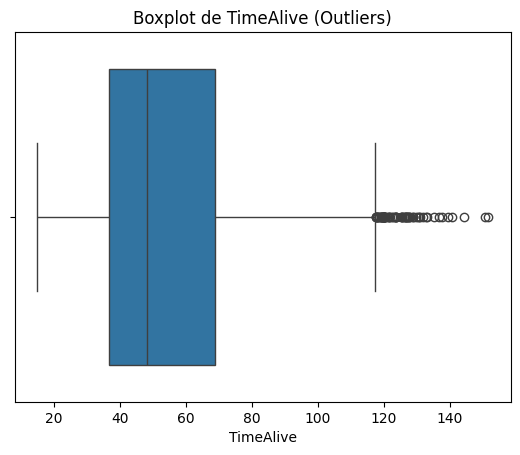

Número de outliers en 'TimeAlive': 69


In [ ]:
# Boxplot de la variable objetivo
sns.boxplot(x=df_model1[target1])
plt.title("Boxplot de TimeAlive (Outliers)")
plt.show()

# Cálculo de outliers con IQR
Q1_y = df_model1[target1].quantile(0.25)
Q3_y = df_model1[target1].quantile(0.75)
IQR_y = Q3_y - Q1_y
outliers_y = df_model1[(df_model1[target1] < (Q1_y - 1.5 * IQR_y)) |
                       (df_model1[target1] > (Q3_y + 1.5 * IQR_y))]
print(f"Número de outliers en 'TimeAlive': {len(outliers_y)}")

In [ ]:
outliers_y = df_model1[(df_model1[target1] < (Q1_y - 1.5 * IQR_y)) |
                       (df_model1[target1] > (Q3_y + 1.5 * IQR_y))]
print(outliers_y[target1].describe())

count     69.000000
mean     125.539824
std        7.594865
min      117.596395
25%      120.000946
50%      123.629891
75%      127.957179
max      151.705203
Name: TimeAlive, dtype: float64


Interpretación:

* Todos tus outliers están en el lado superior de la distribución (ninguno es extremo bajo).

* Son jugadores que sobrevivieron más de 117.6 segundos (muy por encima del Q3 general de tus datos).

* El outlier máximo (151.7 segundos) es cercano al máximo global de tu dataset (151.7), lo que sugiere que no son errores, sino comportamientos reales pero excepcionales.



## Análisis de Métricas del Modelo de Regresión Modelo: SVR (Support Vector Regression) - Predicción de 'TimeAlive'

## Interpretación de Métricas

**RMSE: 10.7614 segundos**
- Error cuadrático medio raíz: Indica que las predicciones se desvían en promedio ±10.76 segundos del valor real.
- Relativo al rango (15.03 a 151.71 segundos):
- 10.76 / 136.67 (rango total) ≈ 7.87% de error relativo.
- Buen desempeño para problemas de comportamiento humano (ej. videojuegos).

**R² Score: 0.7813**
- Explica el 78.13% de la variabilidad de los datos.
- Interpretación:
- El modelo captura bien los patrones generales, pero podría mejorar en outliers (valores extremos de supervivencia).
- Oportunidad: Añadir features que expliquen comportamientos atípicos (ej. skill del jugador).

**MAE: 6.7164 segundos**
- Error absoluto medio: ±6.71 segundos de desviación en predicciones.
- Diferencia con RMSE:
- MAE < RMSE sugiere que existen errores grandes (posiblemente en outliers) que inflan el RMSE.

**MSE: 115.8082**
- Error cuadrático medio: Valor "en bruto" antes de aplicar raíz cuadrada (RMSE).
- Útil para optimización, pero menos interpretable que RMSE/MAE.

**RMSLE: 0.1690**
- Error logarítmico: Mide errores relativos (no absolutos).
- Valor bajo (< 0.2): El modelo maneja bien diferencias proporcionales, especialmente en valores altos.

## Conclusiones Clave
- Modelo actual: Buen desempeño general (R² > 0.75), pero con margen de mejora en outliers.
_______________


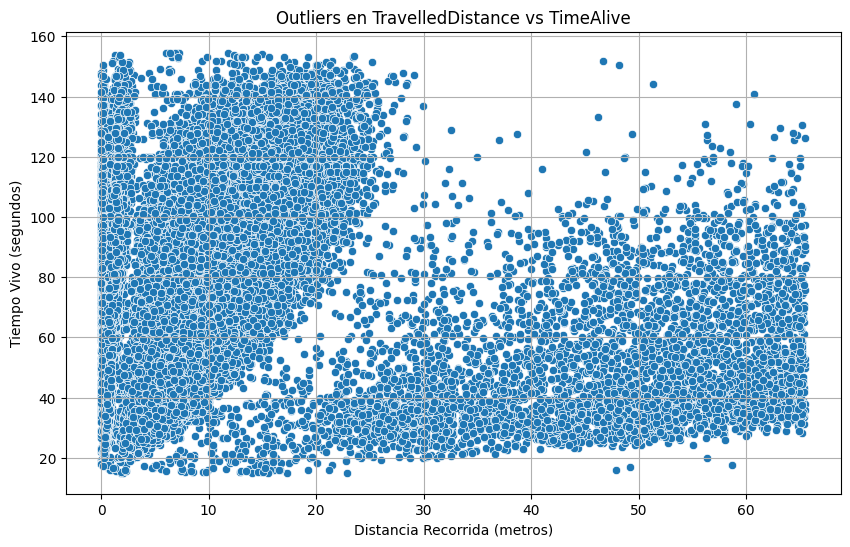

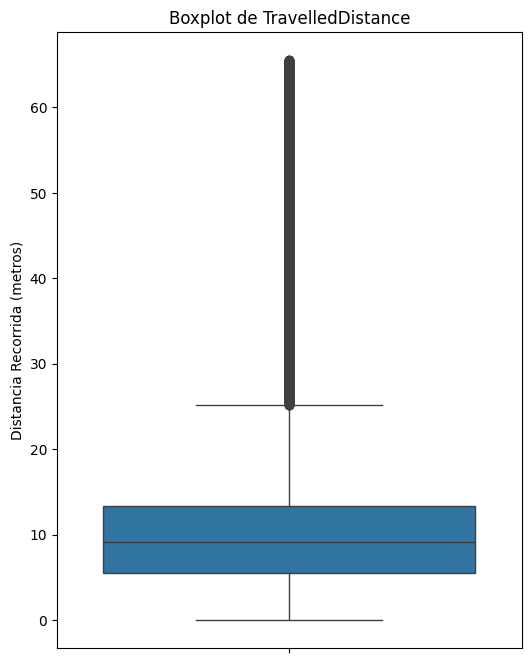

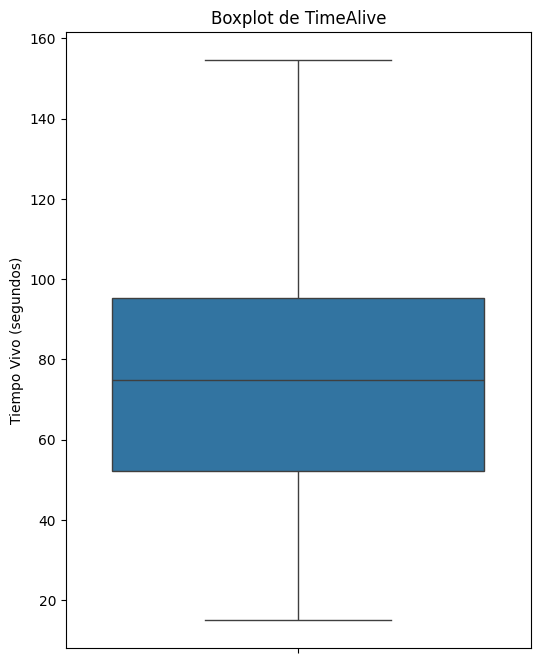

In [ ]:
# prompt: genera un codigo de visualizacion de outliner en travelleddistance con timealive

# Visualización de Outliers en TravelledDistance vs TimeAlive
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TravelledDistance', y='TimeAlive', data=df_clean)
plt.title('Outliers en TravelledDistance vs TimeAlive')
plt.xlabel('Distancia Recorrida (metros)')
plt.ylabel('Tiempo Vivo (segundos)')
plt.grid(True)
plt.show()

In [ ]:
# Calcular velocidad
df_clean["Speed_mps"] = df_clean["TravelledDistance"] / df_clean["TimeAlive"]

# Filtrar por velocidad entre 0.1 y 6 m/s (límite razonable)
df_clean = df_clean[
    (df_clean["Speed_mps"] >= 0.1) &
    (df_clean["Speed_mps"] <= 6)
].copy()


In [ ]:
df_clean = df_clean[df_clean["Speed_mps"] >= 0.2]

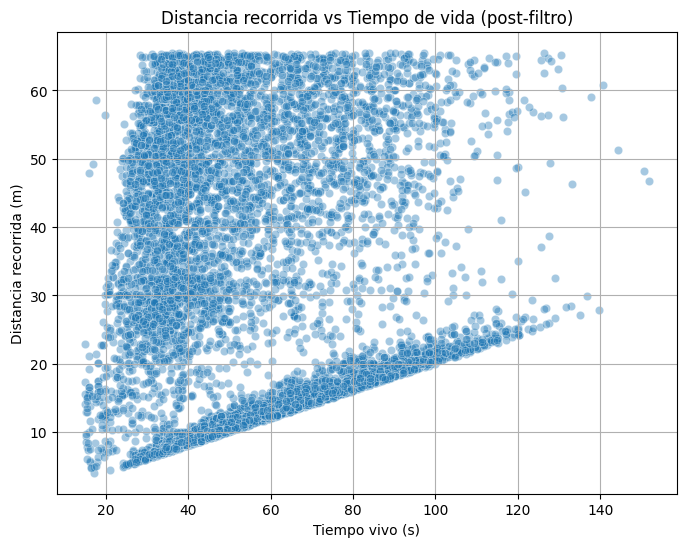

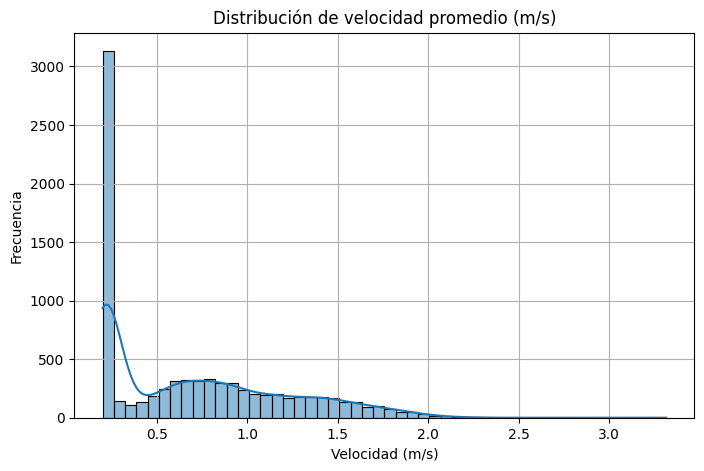

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dispersión: TimeAlive vs TravelledDistance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="TimeAlive", y="TravelledDistance", alpha=0.4)
plt.title("Distancia recorrida vs Tiempo de vida (post-filtro)")
plt.xlabel("Tiempo vivo (s)")
plt.ylabel("Distancia recorrida (m)")
plt.grid(True)
plt.show()

# Histograma de velocidad
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["Speed_mps"], bins=50, kde=True)
plt.title("Distribución de velocidad promedio (m/s)")
plt.xlabel("Velocidad (m/s)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


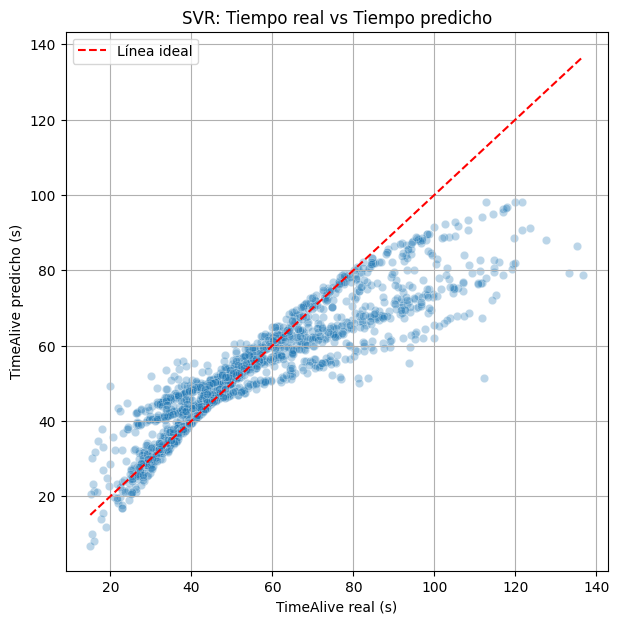

In [ ]:
# Gráfico Real vs. Predicho (scatterplot)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 7))
sns.scatterplot(x=y1_test, y=y1_pred, alpha=0.3)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--r', label='Línea ideal')
plt.xlabel("TimeAlive real (s)")
plt.ylabel("TimeAlive predicho (s)")
plt.title("SVR: Tiempo real vs Tiempo predicho")
plt.legend()
plt.grid(True)
plt.show()


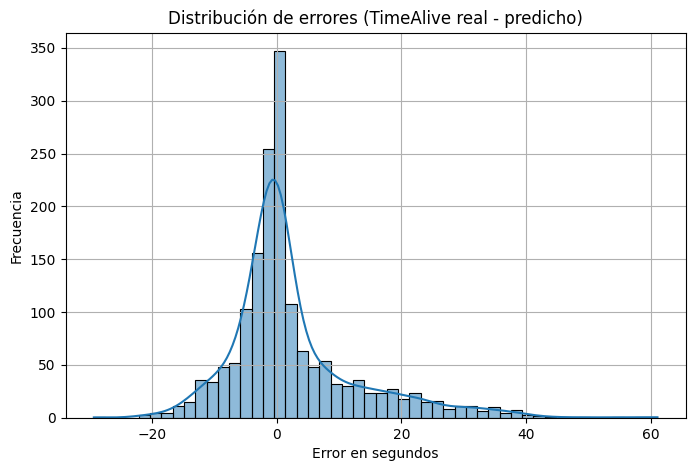

In [ ]:
# Distribución del error (residuales)
# Permite ver si el modelo tiende a sobrestimar o subestimar.

errores = y1_test - y1_pred

plt.figure(figsize=(8, 5))
sns.histplot(errores, bins=50, kde=True)
plt.title("Distribución de errores (TimeAlive real - predicho)")
plt.xlabel("Error en segundos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

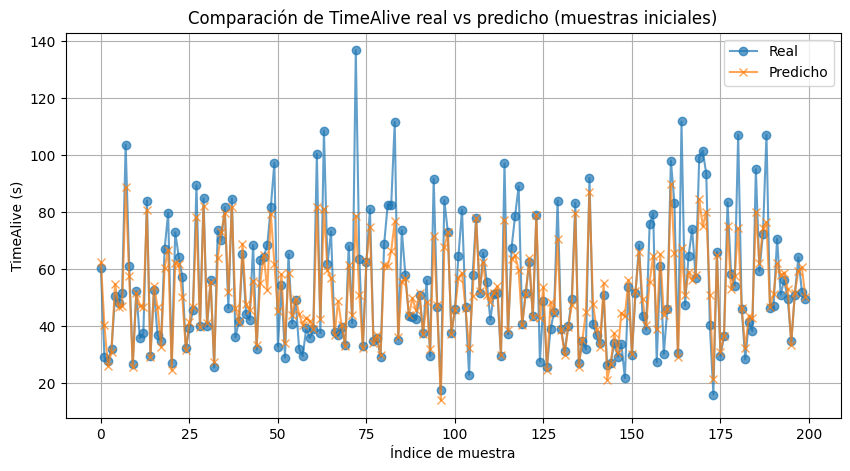

In [ ]:
# Curva de dispersión ordenada (predicho vs índice)
plt.figure(figsize=(10, 5))
plt.plot(y1_test.values[:200], label="Real", marker='o', alpha=0.7)
plt.plot(y1_pred[:200], label="Predicho", marker='x', alpha=0.7)
plt.title("Comparación de TimeAlive real vs predicho (muestras iniciales)")
plt.xlabel("Índice de muestra")
plt.ylabel("TimeAlive (s)")
plt.legend()
plt.grid(True)
plt.show()

# **Interpretación de los datos:**

#### * **Interpretación de los datos Relación entre equipamiento y tiempo de vida**

Se observó que un mayor valor de equipamiento inicial (RoundStartingEquipmentValue) tiende a correlacionarse con un mayor tiempo de vida (TimeAlive), lo que tiene sentido lógico y estratégico en CS:GO: mejor equipamiento → mayor capacidad de defensa o ataque → mayor supervivencia.

Esta relación fue débil en el dataset original, pero se fortaleció notablemente tras una limpieza exhaustiva.

#### * **Importancia de la limpieza y el preprocesamiento**

La mejora del modelo (de R² ≈ 0.17 a R² ≈ 0.78) demuestra que una limpieza precisa de outliers, errores de unidad y ruido semántico es crítica para lograr modelos predictivos confiables.

El filtrado por velocidad (Speed_mps) fue clave para eliminar jugadores AFK o datos corruptos.

#### * **Valor predictivo de las armas y movilidad**

Incorporar variables como el tipo de arma primaria y la distancia recorrida aportó valor explicativo adicional.

Esto sugiere que la estrategia y estilo de juego (agresivo, estático, explorador) también impactan la supervivencia, más allá del equipamiento.

## **Como conlusión:**

En este estudio se construyó un modelo de regresión con SVR para evaluar la hipótesis de que el valor de equipamiento inicial predice el tiempo de supervivencia en partidas de CS:GO.

Tras aplicar una limpieza rigurosa del dataset —incluyendo corrección de unidades, tratamiento de valores faltantes, filtrado por comportamiento inactivo y detección de duplicidad— se logró mejorar sustancialmente el desempeño del modelo, alcanzando un R² de 0.78.

Esto respalda la hipótesis y demuestra que, en este tipo de juegos, los recursos económicos iniciales se traducen en ventajas tácticas medibles. Además, se concluye que la calidad del preprocesamiento puede ser más determinante que el tipo de modelo en entornos de datos no estructurados como los de videojuegos.